In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA - Mobile Price Classification

In this notebook we are going to perform exploratory data anlysis (EDA) on Kaggle's mobile price prediction dataset. The intent of this notebook is exclusively to get insights about the dataset. Model building will be performed in a different notebook.

- Dataset source: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?datasetId=11167&sortBy=voteCount 
- Download date: `12.08.2023`

## Global Settings

In [15]:
RANDOM_SEED = 42
DATASET_FOLDER = '../datasets/mobile_price_classification'

## Train Set Insights

In [3]:
train = pd.read_csv(f'{DATASET_FOLDER}/train.csv')
print(train.shape)
train.head(5)

(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
train['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

The `train` dataset's target variable `price_range` contains 4 different classes. The occurence rate of each class is the same, thus, we have a __balanced classification problem__.

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [20]:
TARGET = 'price_range'
FEATURES = list(set(train.columns).difference({TARGET}))
print(f"# of features: {len(FEATURES)}")

# of features: 20


The dataset contains 20 candidate feature to use for the prediction of the target `price_range`.

## Feature Distributions

First, we will simply observe the distributions of each of the 20 features.

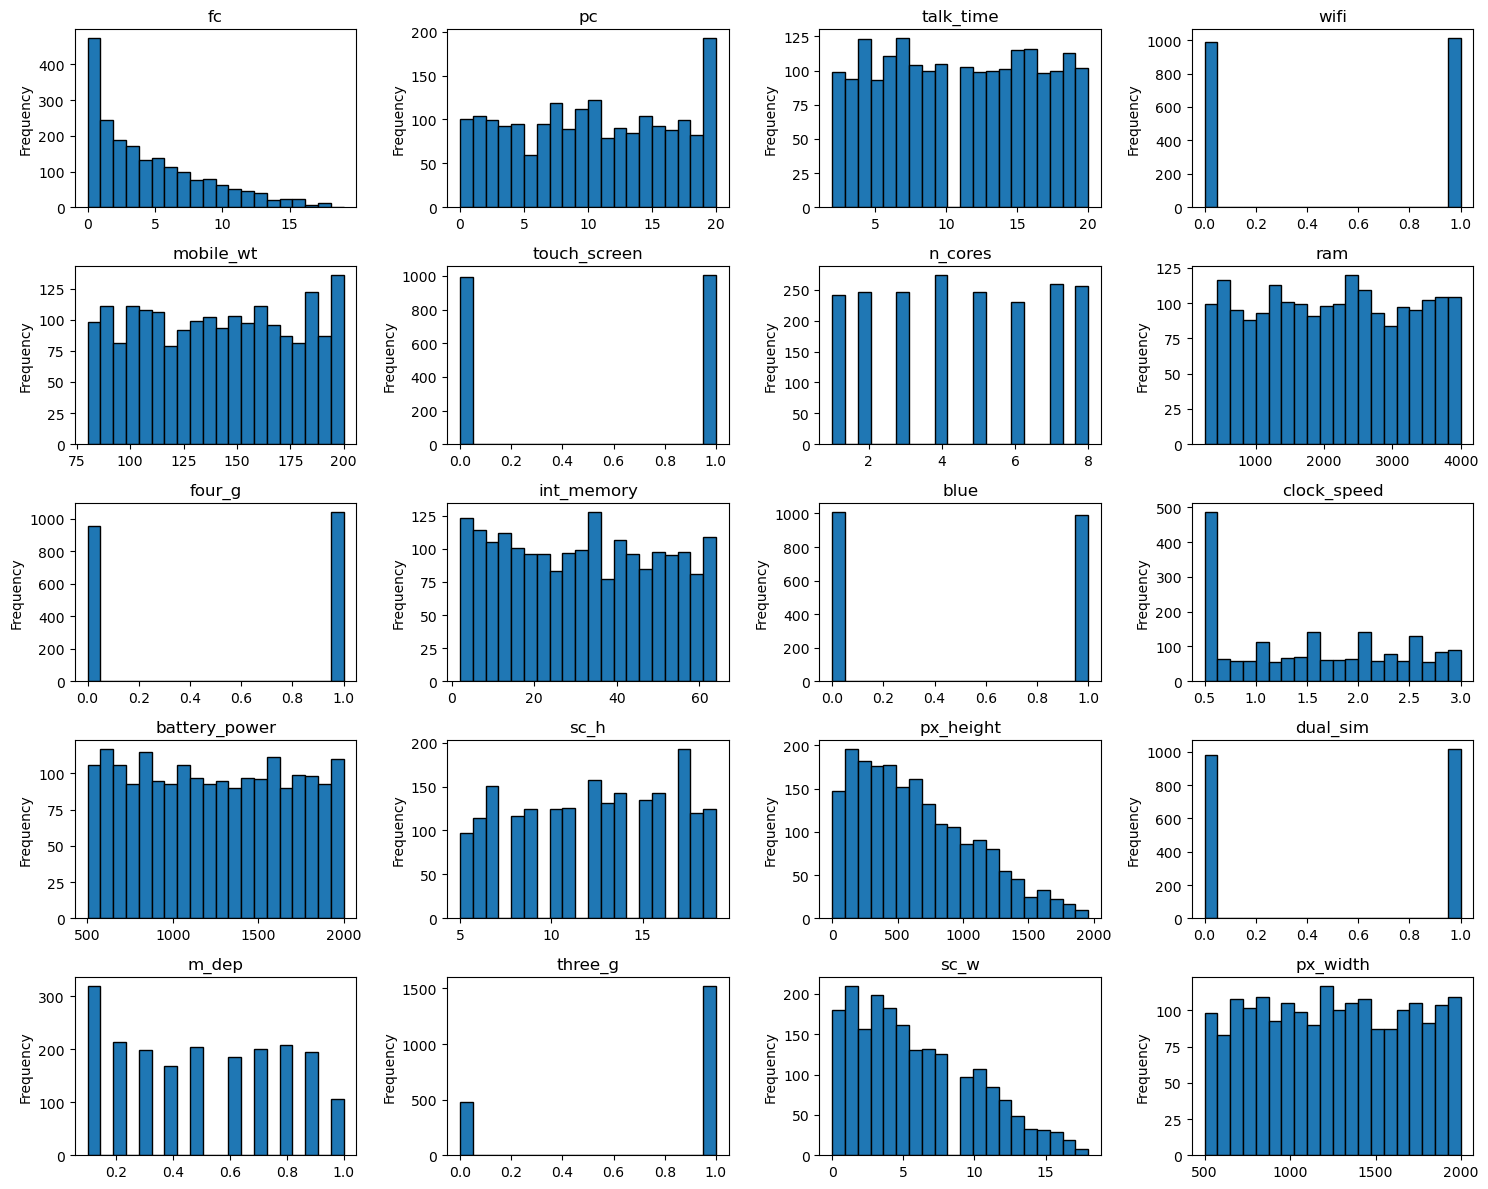

In [18]:
n_rows, n_cols = 5, 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
axes = axes.flatten()

for i, (feature, ax) in enumerate(zip(FEATURES, axes)):
    ax.hist(train[feature], bins=20, edgecolor='black')
    ax.set_title(f'{feature}')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

- It seems like there are 6 binary features: `wifi`, `touch_screen`, `four_g`, `blue`, `dual_sim`, `three_g`
- The other features are either discrete or continuous

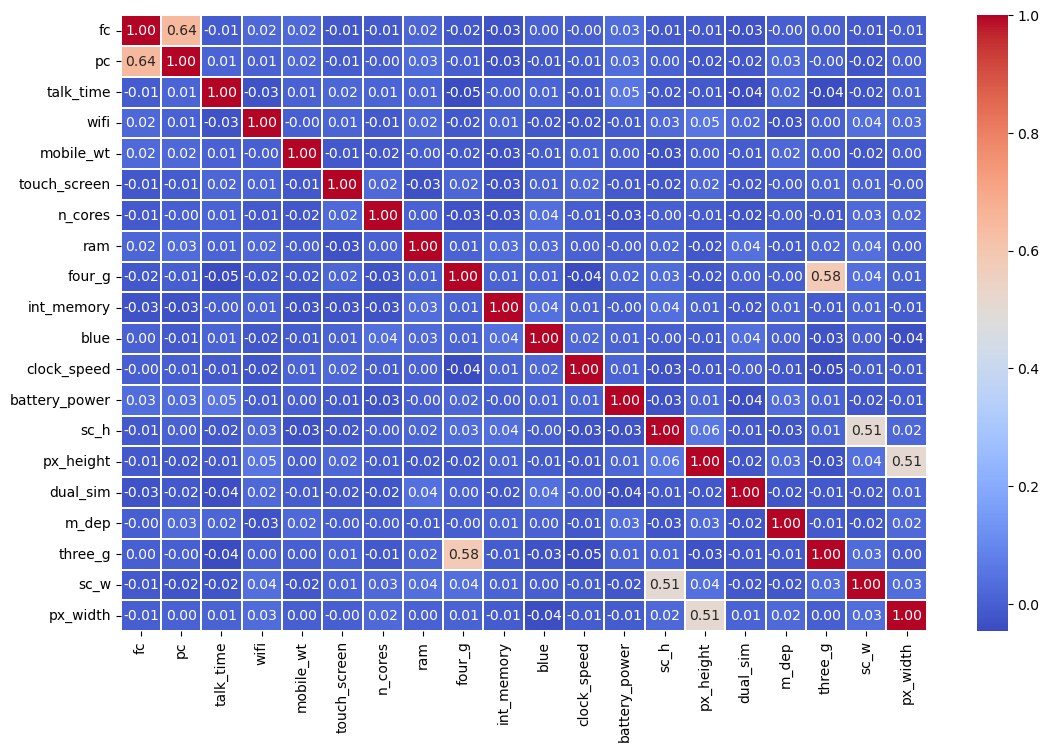

In [29]:
corr_mat = train[FEATURES].corr()
plt.figure(figsize=(13, 8))
sns.heatmap(corr_mat, vmax=1, annot=True, linewidths=.2, fmt=".2f", cmap='coolwarm')
plt.xticks(rotation=90)
plt.show()

## Target Against Features

Now we will inverstigate the relationship of each feature to the target `price_range`.

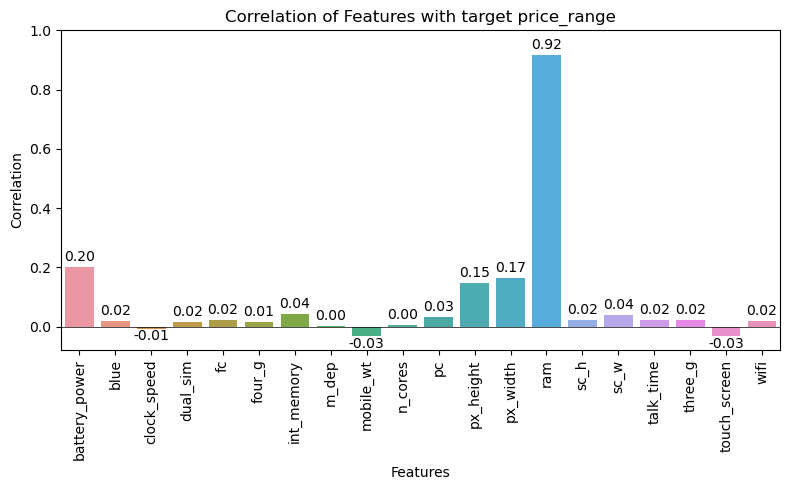

In [35]:
corrs = train.corr()[TARGET].drop(TARGET)

plt.figure(figsize=(8, 5))
sns.barplot(x=corrs.index, y=corrs.values)
plt.axhline(y=0, color='black', linewidth=0.5)
for i, corr in enumerate(corrs.values):
    plt.text(i, corr + 0.02 if corr >= 0 else corr - 0.04, f"{corr:.2f}", ha='center', fontsize=10, color='black')

plt.xticks(rotation=90)
plt.yticks(np.arange(0.0, 1.2, 0.2))
plt.xlabel("Features")
plt.ylabel(f"Correlation")
plt.title(f"Correlation of Features with target {TARGET}")
plt.tight_layout()
plt.show()

Most features have very low correlation with the target `price_range`. However, `ram` alone is correlation with 92% with `price_range`. This suggest that `ram` will probably be a strong feature when training a model.

If we don't want to use all 20 features, we could select only the ones with a correlation above a certain threshold. However, note that a high correlation is not mandatory for a feature to be informative for the model.